<img src = "https://thumbs2.imgbox.com/32/93/xRH3CBEG_t.png" width="250">

# Modelo Índice de Perda por Inadimplência
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score

from funcoes.funcoes import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
LC_defaults = pd.read_csv('dados/dados_WoE_VI_LGD_EAD_regressao.csv')

In [3]:
LC_defaults.head()

,funded_amnt,term,int_rate,annual_inc,dti,inq_last_6mths,revol_util,tot_cur_bal,mths_since_rcnt_il,total_bal_il,...,initial_list_status:w,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,taxa_recuperacao,taxa_recuperacao_0_1,fator_conversao_credito
0,9000,36,5.32,58000.0,10.39,0,4.2,7063,26,1982,...,1,0,0,0,0,0,0,0.0,0,0.0
1,8300,36,9.44,54000.0,16.91,0,30.7,26958,4,21058,...,1,1,0,0,0,0,0,0.0,0,0.0
2,4225,36,17.57,35000.0,29.25,2,82.0,35796,0,0,...,0,0,0,1,0,0,0,0.0,0,0.0
3,28000,36,7.49,425000.0,8.97,0,28.0,503070,0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
4,3000,36,5.31,72000.0,14.60,0,3.0,305664,3,28880,...,1,0,0,0,0,0,0,0.0,0,0.0


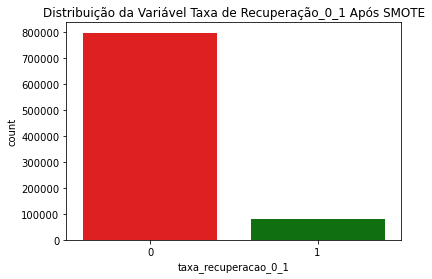

In [4]:
plt.title('Distribuição da Variável Taxa de Recuperação_0_1 Após SMOTE')
sns.countplot(x = LC_defaults.taxa_recuperacao_0_1 , palette = ['red', 'green']);

In [5]:
# separando dados
X = LC_defaults.drop(['target', 'taxa_recuperacao', 'taxa_recuperacao_0_1', 'fator_conversao_credito', 'funded_amnt', 'total_rec_prncp', 'recoveries'], axis = 1)
y = LC_defaults['taxa_recuperacao_0_1']

In [6]:
# tratando o desbalanceamento das classes da variável taxa_recuperacao_0_1
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [7]:
# separando dados de teste e treino
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

In [8]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1117625, 38)
(478983, 38)
(1117625,)
(478983,)


In [9]:
# Instanciando a função
scaler = StandardScaler()

# Transformando os dados
Xtrain_scaled = scaler.fit_transform(X_train1)
Xtest_scaled = scaler.transform(X_test1)

### Regressão Logística - Parte 1

In [10]:
reglgd1 = LogisticRegression_with_p_values()
reglgd1.fit(X_train1, y_train1)

In [11]:
nomes_features = X_train1.columns.values

In [12]:
tabela_sumario = pd.DataFrame(columns = ['nome_feature'], data = nomes_features)
tabela_sumario['coeficiente'] = np.transpose(reglgd1.coef_)
tabela_sumario.index = tabela_sumario.index + 1
tabela_sumario.loc[0] = ['intercept', reglgd1.intercept_[0]]
tabela_sumario = tabela_sumario.sort_index()

p_values = reglgd1.p_values
p_values = np.append(np.nan, np.array(p_values))
tabela_sumario['p_valor'] = p_values
tabela_sumario

,nome_feature,coeficiente,p_valor
0,intercept,-1.447064e-04,NaN
1,term,4.492722e-03,1.835149e-125
2,int_rate,9.666047e-03,2.180057e-69
3,annual_inc,-6.001198e-07,1.612923e-43
4,dti,1.586323e-03,2.324074e-24
5,inq_last_6mths,-3.271905e-04,8.960244e-01
6,revol_util,6.866662e-03,0.000000e+00
7,tot_cur_bal,-7.505393e-07,0.000000e+00
8,mths_since_rcnt_il,-1.452646e-02,0.000000e+00
9,total_bal_il,-1.533378e-06,1.115941e-138


#### Testando o modelo

In [13]:
y_pred_test1  = reglgd1.model.predict(X_test1)
y_test_proba1 = reglgd1.model.predict_proba(X_test1)

In [14]:
y_test_proba1 = y_test_proba1[: ][: , 1]

In [15]:
y_test1_temp = y_test1

y_test1_temp.reset_index(drop = True, inplace = True)
df_pred_probs_atual = pd.concat([pd.DataFrame(y_test1_temp), pd.DataFrame(y_test_proba1)], axis = 1)
df_pred_probs_atual.columns = ['y_test1', 'y_test_proba1']
df_pred_probs_atual.index = X_test1.index
df_pred_probs_atual.head()

,y_test1,y_test_proba1
831940,0,0.483107
1423765,1,0.545522
623730,0,0.490970
1586908,1,0.475697
756497,1,0.608236


#### Estimando o acurácia do modelo

In [16]:
tr = 0.5
df_pred_probs_atual['y_pred_test1'] = np.where(df_pred_probs_atual['y_test_proba1'] > tr, 1, 0)

In [17]:
pd.crosstab(df_pred_probs_atual['y_test1'], df_pred_probs_atual['y_pred_test1'], rownames = ['atual'], colnames = ['predito'])

predito,0,1
atual,,
0,125415,114031
1,68997,170540


In [18]:
pd.crosstab(df_pred_probs_atual['y_test1'], df_pred_probs_atual['y_pred_test1'], 
            rownames = ['atual'], colnames = ['predito']) / df_pred_probs_atual.shape[0]

predito,0,1
atual,,
0,0.261836,0.238069
1,0.144049,0.356046


In [19]:
(pd.crosstab(df_pred_probs_atual['y_test1'], df_pred_probs_atual['y_pred_test1'], rownames = ['atual'], colnames = ['predito']) / df_pred_probs_atual.shape[0]).iloc[0, 0] + (pd.crosstab(df_pred_probs_atual['y_test1'], df_pred_probs_atual['y_pred_test1'], rownames = ['atual'], colnames = ['predito']) / df_pred_probs_atual.shape[0]).iloc[1, 1]

0.6178820542691494

In [20]:
tfp, tvp, thresholds = roc_curve(df_pred_probs_atual['y_test1'], df_pred_probs_atual['y_test_proba1'])

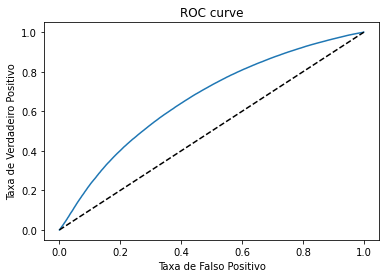

In [21]:
plt.plot(tfp, tvp)
plt.plot(tfp, tfp, linestyle = '--', color = 'k')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('ROC curve');

In [22]:
AUROC = roc_auc_score(df_pred_probs_atual['y_test1'], df_pred_probs_atual['y_test_proba1'])
AUROC

0.6621780688724193

In [23]:
y_pred_train1 = reglgd1.model.predict(X_train1)
y_pred_train1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
print('Acurácia de teste: {0:0.4f}'.format(accuracy_score(y_test1, y_pred_test1)))
print('Acurácia de treino: {0:0.4f}'.format(accuracy_score(y_train1, y_pred_train1)))

Acurácia de teste: 0.6179
Acurácia de treino: 0.6189


Comparação da precisão do conjunto de treino e do conjunto de teste para verificar se há overfitting. Como os valores são próximos, não há overfiting (uma grande diferença nos dois valores pode indicar overfitting ou underfitting). 

In [25]:
print('Score de treino: {:.4f}'.format(reglgd1.model.score(X_train1, y_train1)))
print('Score de teste: {:.4f}'.format(reglgd1.model.score(X_test1, y_test1)))

Score de treino: 0.6189
Score de teste: 0.6179


In [26]:
print(classification_report(y_test1, y_pred_test1))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58    239446
           1       0.60      0.71      0.65    239537

    accuracy                           0.62    478983
   macro avg       0.62      0.62      0.61    478983
weighted avg       0.62      0.62      0.61    478983



#### Salvando o modelo

In [27]:
import pickle
pickle.dump(reglgd1, open('modelos/modelo_lgd_v1.sav', 'wb'))

### Resultados

   - A acurácia do modelo de regressão logística foi de 61% e a ROC-AUC que se aproxima de 1. Assim, pode-se concluir que o classificador fez um bom trabalho em prever a taxa de recuperação, sem mostrar sinais de overfitting. 
    
   - f-1 score: 65%, Recall: 71%

### Regressão Linear - Parte 2

In [28]:
LC_defaults2 = LC_defaults[LC_defaults['taxa_recuperacao_0_1'] == 1]

In [29]:
# separando dados
X2 = LC_defaults2.drop(['target', 'taxa_recuperacao','taxa_recuperacao_0_1', 'fator_conversao_credito', 'funded_amnt', 'total_rec_prncp', 'recoveries'] , axis = 1)
y2 = LC_defaults2['taxa_recuperacao']

In [30]:
# separando dados de teste e treino
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [31]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(55540, 38)
(23804, 38)
(55540,)
(23804,)


In [32]:
# Instanciando a função
scaler = StandardScaler()

# Transformando os dados
Xtrain_scaled = scaler.fit_transform(X_train2)
Xtest_scaled = scaler.transform(X_test2)

In [33]:
reglgd2 = LinearRegression()
reglgd2.fit(X_train2, y_train2)

LinearRegression()

In [34]:
nomes_features = X_train2.columns.values

In [35]:
tabela_sumario = pd.DataFrame(columns = ['nome_feature'], data = nomes_features)
tabela_sumario['coeficiente'] = np.transpose(reglgd2.coef_)
tabela_sumario.index = tabela_sumario.index + 1
tabela_sumario.loc[0] = ['intercept', reglgd2.intercept_]
tabela_sumario = tabela_sumario.sort_index()

p_values = reglgd2.p
p_values = np.append(np.nan,np.array(p_values))
tabela_sumario['p_valor'] = p_values.round(3)
tabela_sumario

,nome_feature,coeficiente,p_valor
0,intercept,7.922448e-02,NaN
1,term,5.572222e-04,0.000
2,int_rate,-9.513980e-05,0.665
3,annual_inc,-8.330514e-09,0.176
4,dti,3.005757e-04,0.000
5,inq_last_6mths,-1.525047e-03,0.000
6,revol_util,-1.047867e-04,0.000
7,tot_cur_bal,2.442837e-08,0.000
8,mths_since_rcnt_il,8.467217e-05,0.000
9,total_bal_il,2.255243e-08,0.105


#### Avaliação da regressão linear

In [37]:
y_pred_test2 = reglgd2.predict(X_test2)

In [38]:
# baixa correlação, mas satisfatórica para um modelo LGD
# caso a correlação fosse muito alta, o modelo teria que ser refeito
y_test_temp2 = y_test2
y_test_temp2 = y_test_temp2.reset_index(drop = True)
pd.concat([pd.DataFrame(y_test_temp2), pd.DataFrame(y_pred_test2)], axis = 1).corr()

,taxa_recuperacao,0
taxa_recuperacao,1.000000,0.148884
0,0.148884,1.000000


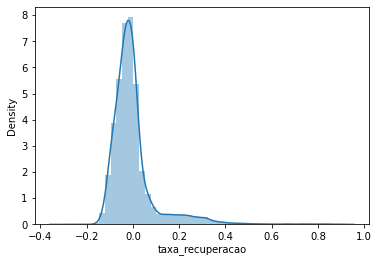

In [39]:
# distribuição concentrada perto de zero, condizendo com os dados
# então o modelo é aceitável metodologicamente
sns.distplot(y_test2 - y_pred_test2);

O valor RMSE foi encontrado para ser 0.10. Isso significa que o desvio padrão para nossa previsão é 0.10. 

In [40]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test2, y_pred_test2)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 0.10


In [41]:
# verificando over ou underfiting
print('Score de treino: {:.4f}'.format(reglgd2.score(X_train2, y_train2)))
print('Score de teste: {:.4f}'.format(reglgd2.score(X_test2, y_test2)))

Score de treino: 0.0238
Score de teste: 0.0218


#### Salvando o modelo

In [42]:
import pickle
pickle.dump(reglgd2, open('modelos/modelo_lgd_v2.sav', 'wb'))

### Combinando os modelos

Na regressão logística o valor da taxa de recuperação foi classificado em 1 ou 0, e nos casos em que era 1, seu valor foi predito pela regressão linear. 

In [43]:
y_pred_test_comb = reglgd2.predict(X_test1)

In [44]:
y_pred_test_comb

array([0.11420379, 0.10081259, 0.10644427, ..., 0.12739744, 0.12322937,
       0.10879644])

Combinando as estimações dos modelos multiplicando os valores preditos. 

In [45]:
y_hat_test_lgd = df_pred_probs_atual.y_pred_test1 * y_pred_test_comb

Valores máximos e mínimos dentro dos valores que deveriam ser preditos, 1 e 0.

In [46]:
pd.DataFrame(y_hat_test_lgd).describe()

,y_pred_test1
count,478983.000000
mean,0.064622
std,0.054218
min,0.000000
25%,0.000000
50%,0.097538
75%,0.109740
max,0.430175


---